# Numerical methods of solving Cauchy problem

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
a = 1
b = 2


def f(t, u):
    return -u / t * np.log(u / t)
u_0 = 1


def df(t, u):
    return -(np.log(u) - np.log(t) + 1) / t


def u(t):
    return t * np.exp((1 - t) / t)

In [115]:
tau = 0.1
tau_2 = 0.05

N = int((b - a) / tau)
t = [a + tau * i for i in range(N + 1)]
N_2 = int((b - a) / tau_2)
t_2 = [a + tau_2 * i for i in range(N_2 + 1)]

### Implicit trapeze method

In [116]:
eps = 10 ** -7

def trapeze_method(N, tau, t):
    y = [u_0] + [0] * N
    for i in range(1, N + 1):
        y[i] = y[i - 1]
        accuracy = np.inf

        while accuracy > eps:
            y_prev = y[i]
            y[i] = y_prev - (y_prev - y[i - 1] - tau / 2 * (f(t[i - 1], y[i - 1]) + f(t[i], y_prev))) / (1 - tau / 2 * df(t[i], y_prev))
            accuracy = abs(y[i] - y_prev)
            
    return y

In [117]:
y = trapeze_method(N, tau, t)

In [118]:
y_2 = trapeze_method(N_2, tau_2, t_2)

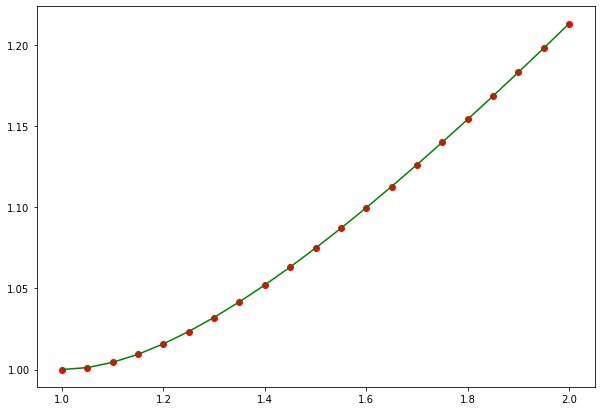

In [119]:
u_lst = [u(i) for i in t_2]
plt.figure(figsize=(10, 7))
plt.plot(t_2, u_lst, c='g')
plt.scatter(t_2, y_2, c='r')
plt.show()

In [120]:
print(np.linalg.norm([u_lst[i] - y_2[i] for i in range(N_2)], np.inf))

0.00014089455020882546


### Runge-Kutta method

In [121]:
def rk_method(N, tau, t, C, a, b, s):
    y = [u_0] + [0] * N
    for i in range(1, N + 1):
        K = [0] * s
        for j in range(s):
            K[j] = f(t[i] + C[j] * tau, y[i - 1] + tau * sum([a[j][k] * K[k] for k in range(j)]))
        y[i] = y[i - 1] + tau * np.dot(np.array(b), np.array(K))
    return y

In [122]:
y = rk_method(N, tau, t, C=[0, 2], a=[[0, 0], [2/3, 0]], b=[1/4, 3/4], s=2)

In [123]:
y_2 = rk_method(N_2, tau_2, t_2, C=[0, 2], a=[[0, 0], [2/3, 0]], b=[1/4, 3/4], s=2)

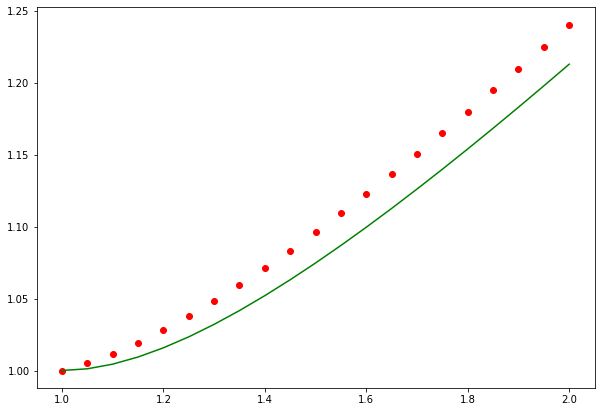

In [124]:
plt.figure(figsize=(10, 7))
plt.plot(t_2, u_lst, c='g')
plt.scatter(t_2, y_2, c='r')
plt.show()

In [125]:
m = 2
y_2_comp = y_2[::2]
print(np.linalg.norm([y[i] - y_2_comp[i] for i in range(N + 1)], np.inf) / (2 ** m - 1))

0.007543355045078822
